# Determinación de los parámetros de un CCD

In [1]:
import astropy.io.fits as fits
from astropy.table import Table

import matplotlib.pyplot as plt
import numpy as np

from matplotlib.ticker import AutoMinorLocator
from scipy.interpolate import UnivariateSpline

In [2]:
datPath = 'CCD_2223/'

In [3]:
# Cargamos todos los datos

tab = Table.read(datPath+'files_all.txt', format='ascii.fixed_width_two_line')
print(tab)

            filename                    DATE-OBS        EXPTIME  IMAGETYP 
------------------------------- ----------------------- ------- ----------
practicas2223.00000065.BIAS.FIT 2022-10-20T08:19:01.649     0.0 Bias Frame
practicas2223.00000066.BIAS.FIT 2022-10-20T08:19:52.691     0.0 Bias Frame
practicas2223.00000067.BIAS.FIT 2022-10-20T08:19:55.640     0.0 Bias Frame
practicas2223.00000068.BIAS.FIT 2022-10-20T08:19:58.622     0.0 Bias Frame
practicas2223.00000069.BIAS.FIT 2022-10-20T08:20:01.572     0.0 Bias Frame
practicas2223.00000070.DARK.FIT 2022-10-20T08:20:27.910     1.0 Dark Frame
practicas2223.00000071.DARK.FIT 2022-10-20T08:21:14.163    10.0 Dark Frame
                            ...                     ...     ...        ...
practicas2223.00000130.DARK.FIT 2022-10-20T09:34:02.285     2.0 Dark Frame
practicas2223.00000131.DARK.FIT 2022-10-20T09:35:00.767     4.0 Dark Frame
practicas2223.00000132.DARK.FIT 2022-10-20T09:35:12.881     6.0 Dark Frame
practicas2223.00000133.DA

### Corriente de oscuridad

In [4]:
# Seleccionamos los darks

tab_dark1 = tab[tab['IMAGETYP']=='Dark Frame'][:7]   #Los primeros
print(tab_dark1)

            filename                    DATE-OBS        EXPTIME  IMAGETYP 
------------------------------- ----------------------- ------- ----------
practicas2223.00000070.DARK.FIT 2022-10-20T08:20:27.910     1.0 Dark Frame
practicas2223.00000071.DARK.FIT 2022-10-20T08:21:14.163    10.0 Dark Frame
practicas2223.00000072.DARK.FIT 2022-10-20T08:21:48.886    20.0 Dark Frame
practicas2223.00000073.DARK.FIT 2022-10-20T08:22:45.108    40.0 Dark Frame
practicas2223.00000074.DARK.FIT 2022-10-20T08:23:58.531   120.0 Dark Frame
practicas2223.00000075.DARK.FIT 2022-10-20T08:26:35.583   240.0 Dark Frame
practicas2223.00000076.DARK.FIT 2022-10-20T08:31:24.186   480.0 Dark Frame


In [5]:
# Elegimos regiones de 51x51

data = fits.getdata(datPath+'practicas2223.00000070.DARK.FIT')
region1 = data[220:271,220:271]
region2 = data[350:401, 310:361]
region3 = data[90:141, 400:451]
print('Región 1:  ','Tamaño:', region1.shape, ' Media:', region1.mean())
print('Región 2:  ','Tamaño:', region2.shape, ' Media:', region2.mean())
print('Región 3:  ','Tamaño:', region3.shape, ' Media:', region3.mean())


Región 1:   Tamaño: (51, 51)  Media: 956.4732795078816
Región 2:   Tamaño: (51, 51)  Media: 959.5774702037678
Región 3:   Tamaño: (51, 51)  Media: 954.2637447135717


In [6]:
# Para los distintos tiempos de exposición

media_dark = np.empty((len(tab_dark1),3)) #guardamos los valores de señal
err_dark = np.empty((len(tab_dark1),3))   #errores
i = 0
for fname in tab_dark1['filename']:
    data = fits.getdata(datPath+fname)
    region1 = data[220:271, 220:271]
    region2 = data[350:401, 310:361]
    region3 = data[90:141, 400:451]
    
    media_dark[i,0] = region1.mean()  #guardamos los datos de cada region
    media_dark[i,1] = region2.mean()
    media_dark[i,2] = region3.mean()
    
    err_dark[i,0] = region1.std()   #guradamos los errores
    err_dark[i,1] = region2.std()
    err_dark[i,2] = region3.std()
    
    i += 1
    
    print(fname, '   Región 1:   ', 'med:', int(region1.mean()), '   desv std:', int(region1.std()))
    print(fname, '   Región 2:   ', 'med:', int(region2.mean()), '   desv std:', int(region2.std()))
    print(fname, '   Región 3:   ', 'med:', int(region3.mean()), '   desv std:', int(region3.std()))
    print()


practicas2223.00000070.DARK.FIT    Región 1:    med: 956    desv std: 17
practicas2223.00000070.DARK.FIT    Región 2:    med: 959    desv std: 28
practicas2223.00000070.DARK.FIT    Región 3:    med: 954    desv std: 19

practicas2223.00000071.DARK.FIT    Región 1:    med: 962    desv std: 65
practicas2223.00000071.DARK.FIT    Región 2:    med: 968    desv std: 230
practicas2223.00000071.DARK.FIT    Región 3:    med: 960    desv std: 91

practicas2223.00000072.DARK.FIT    Región 1:    med: 968    desv std: 129
practicas2223.00000072.DARK.FIT    Región 2:    med: 976    desv std: 423
practicas2223.00000072.DARK.FIT    Región 3:    med: 966    desv std: 137

practicas2223.00000073.DARK.FIT    Región 1:    med: 980    desv std: 247
practicas2223.00000073.DARK.FIT    Región 2:    med: 992    desv std: 752
practicas2223.00000073.DARK.FIT    Región 3:    med: 976    desv std: 222

practicas2223.00000074.DARK.FIT    Región 1:    med: 1025    desv std: 723
practicas2223.00000074.DARK.FIT    Reg

 Corriente de oscuridad: 0.4653 [ADU/s] 
 Nivel de bias: 962.0 [ADU] 
 Errores:  Dark=0.012   Bias=2.5


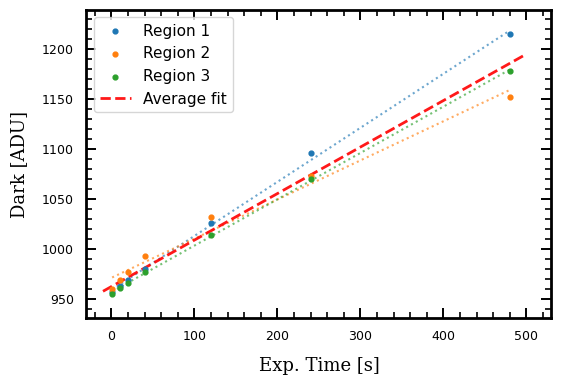

In [7]:
fig, ax = plt.subplots(figsize=(6,4))

# Parámetros del gráfico
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())

ax.tick_params(bottom=True,top=True,left=True,right=True)
ax.tick_params(which='minor',bottom=True,top=True,left=True,right=True)

ax.spines[['bottom','left','top','right']].set_linewidth(2.0)

ax.tick_params(axis='both',which='both',direction='in')
ax.tick_params(axis='both',which='major',labelsize=9,length=7,pad=9,width=1.4)
ax.tick_params(axis='both',which='minor',length=4,width=1.2)

ax.set_xlim([-30,530])
ax.set_ylim([931,1239])

#titulos
ax.set_xlabel('Exp. Time [s]',fontname='Serif',fontsize=13,labelpad=10)
ax.set_ylabel('Dark [ADU]',fontname='Serif',fontsize=13,labelpad=10)

#datos
m_mean, n_mean = 0, 0
for i in range(3):
    leglab = 'Region ' + str(i+1)
    graf = ax.scatter(tab_dark1['EXPTIME'], media_dark[:,i],s=12,label=leglab)
    
    m,n = np.polyfit(tab_dark1['EXPTIME'],media_dark[:,i],deg=1)
    ax.plot(tab_dark1['EXPTIME'],m*tab_dark1['EXPTIME']+n,color=graf.get_facecolors(),zorder=-1,alpha=0.65,
           linestyle='dotted')


# Valores promedio
(DARK, BIAS), Err_Matrix = np.polyfit(tab_dark1['EXPTIME'], np.mean(media_dark, axis=1), deg=1, cov=True)

ax.plot([-10,500],DARK*np.array([-10,500])+BIAS,color='r',alpha=0.9,
        linestyle='dashed',linewidth=2.0,zorder=-1,label='Average fit')

print(' Corriente de oscuridad:', np.round(DARK,4), '[ADU/s]', '\n',
     'Nivel de bias:', np.round(BIAS,1), '[ADU]','\n', 
     f'Errores:  Dark={np.sqrt(Err_Matrix[0,0]):.3f}   Bias={np.sqrt(Err_Matrix[1,1]):.1f}')


ax.legend(fontsize=11)
plt.show()

Comparamos con imagen Bias

In [8]:
tab_bias = tab[tab['IMAGETYP']=='Bias Frame']
print(tab_bias)

            filename                    DATE-OBS        EXPTIME  IMAGETYP 
------------------------------- ----------------------- ------- ----------
practicas2223.00000065.BIAS.FIT 2022-10-20T08:19:01.649     0.0 Bias Frame
practicas2223.00000066.BIAS.FIT 2022-10-20T08:19:52.691     0.0 Bias Frame
practicas2223.00000067.BIAS.FIT 2022-10-20T08:19:55.640     0.0 Bias Frame
practicas2223.00000068.BIAS.FIT 2022-10-20T08:19:58.622     0.0 Bias Frame
practicas2223.00000069.BIAS.FIT 2022-10-20T08:20:01.572     0.0 Bias Frame


In [9]:
bias = 0
err = 0
for fname in tab_bias['filename']:
    bias += fits.getdata(datPath+tab_bias['filename'][i]).mean()
    err += fits.getdata(datPath+tab_bias['filename'][i]).std()**2
bias /= len(tab_bias)
err = np.sqrt(err)/len(tab_bias)

print('Bias:', np.round(bias,1),'[ADU]')
print('Error:', np.round(err,1), '[ADU]')

Bias: 954.5 [ADU]
Error: 7.3 [ADU]


### Ganancia

In [10]:
tab_flat = tab[tab['IMAGETYP']=='Flat Field']
print(tab_flat)
tab_dark2 = tab[tab['IMAGETYP']=='Dark Frame'][7:]  #Los últimos
print(tab_dark2)

            filename                    DATE-OBS        EXPTIME  IMAGETYP 
------------------------------- ----------------------- ------- ----------
practicas2223.00000088.FLAT.FIT 2022-10-20T08:48:48.500     2.0 Flat Field
practicas2223.00000089.FLAT.FIT 2022-10-20T08:49:20.603     2.0 Flat Field
practicas2223.00000090.FLAT.FIT 2022-10-20T08:49:29.576     2.0 Flat Field
practicas2223.00000091.FLAT.FIT 2022-10-20T08:51:50.158     2.0 Flat Field
practicas2223.00000092.FLAT.FIT 2022-10-20T08:55:56.772     2.0 Flat Field
practicas2223.00000093.FLAT.FIT 2022-10-20T08:57:00.077     4.0 Flat Field
practicas2223.00000094.FLAT.FIT 2022-10-20T08:57:26.722     4.0 Flat Field
                            ...                     ...     ...        ...
practicas2223.00000120.FLAT.FIT 2022-10-20T09:16:46.918    20.0 Flat Field
practicas2223.00000121.FLAT.FIT 2022-10-20T09:17:24.190    20.0 Flat Field
practicas2223.00000123.FLAT.FIT 2022-10-20T09:19:29.207    30.0 Flat Field
practicas2223.00000124.FL

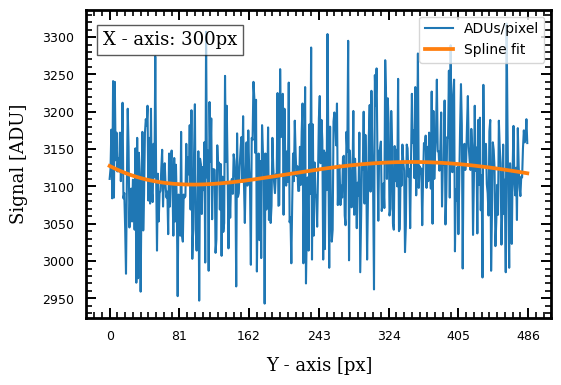

In [11]:
#Flat field de una imagen

data = fits.getdata(datPath+'practicas2223.00000089.FLAT.FIT')
fila = 300

#Ajuste
xi = np.arange(data.shape[0])
uu = UnivariateSpline(xi, data[:,fila], s=6e7, k=4)

# Figura
fig, ax = plt.subplots(figsize=(6,4))

# Parámetros del gráfico
ax.xaxis.set_minor_locator(AutoMinorLocator(n=9))
ax.yaxis.set_minor_locator(AutoMinorLocator())

ax.tick_params(bottom=True,top=True,left=True,right=True)
ax.tick_params(which='minor',bottom=True,top=True,left=True,right=True)

ax.spines[['bottom','left','top','right']].set_linewidth(2.0)

ax.tick_params(axis='both',which='both',direction='in')
ax.tick_params(axis='both',which='major',labelsize=9,length=7,pad=9,width=1.4)
ax.tick_params(axis='both',which='minor',length=4,width=1.2)

ax.set_xticks(np.linspace(0, 486, 7))
ax.set_xlim([-27, 486+27])

#titulos
ax.set_xlabel('Y - axis [px]',fontname='Serif',fontsize=13,labelpad=10)
ax.set_ylabel('Signal [ADU]',fontname='Serif',fontsize=13,labelpad=10)

#datos
ax.plot(data[:,fila], label='ADUs/pixel')
ax.plot(xi, uu(xi), linewidth=2.7, label='Spline fit')

ax.text(70, max(data[:,fila])-22, s='X - axis: '+str(fila)+'px', va='center', ha='center',
       fontname='serif',fontsize=13, bbox={'facecolor': 'white', 'pad': 4, 'alpha': 0.65})
ax.legend(loc=1)

plt.show()

#bbox={'facecolor':'white','edgecolor':'orange','pad':4}



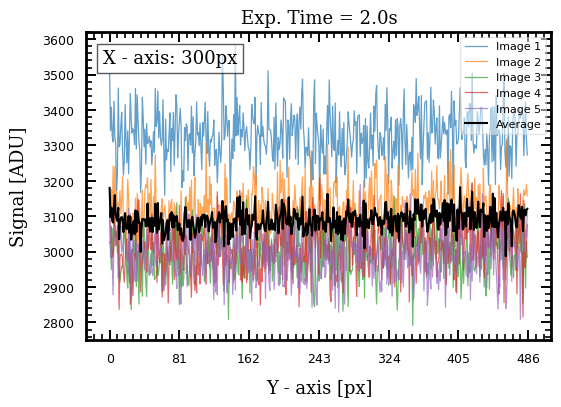

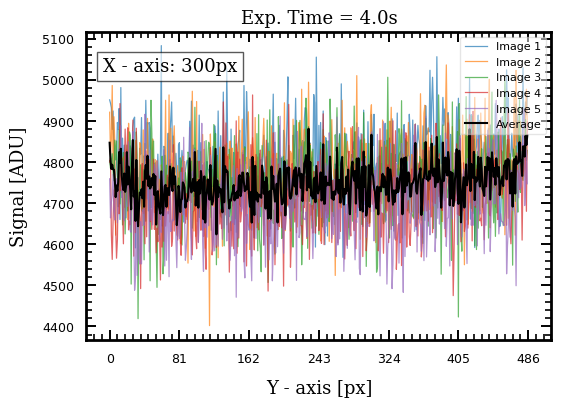

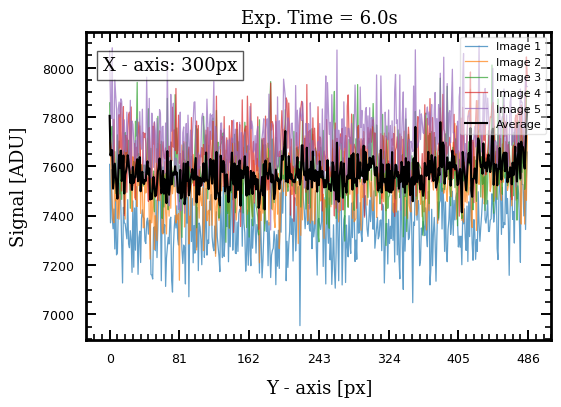

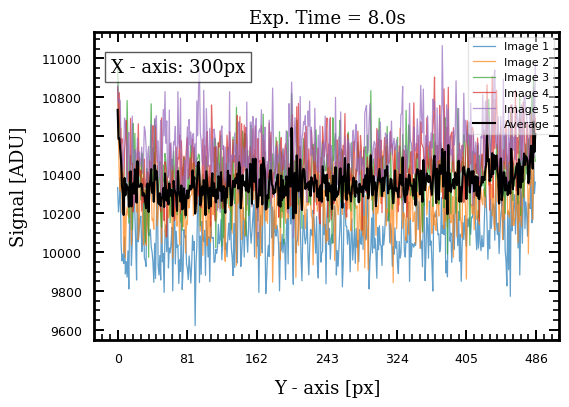

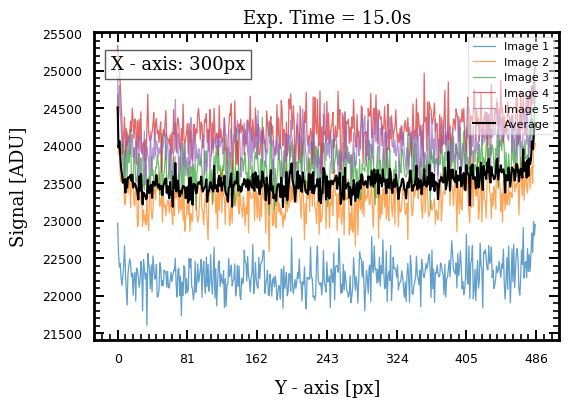

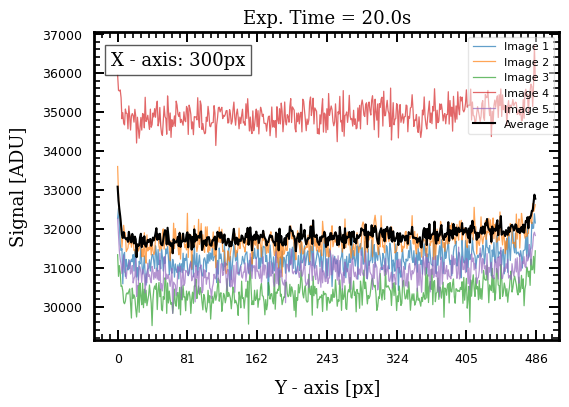

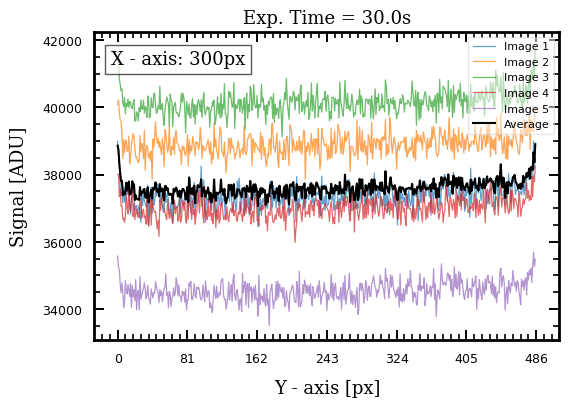

In [12]:
# Imagen promedio

for exptime in np.unique(tab_flat['EXPTIME']):   #Recorremos tiempos de exposición
    Ndata = sum(tab_flat['EXPTIME']==exptime)
    exp_names = (tab_flat[tab_flat['EXPTIME']==exptime])['filename']
    exp_dat = []
    
    # Figura
    fig, ax = plt.subplots(figsize=(6,4))

    # Parámetros del gráfico
    ax.xaxis.set_minor_locator(AutoMinorLocator(n=9))
    ax.yaxis.set_minor_locator(AutoMinorLocator())

    ax.tick_params(bottom=True,top=True,left=True,right=True)
    ax.tick_params(which='minor',bottom=True,top=True,left=True,right=True)

    ax.spines[['bottom','left','top','right']].set_linewidth(2.0)

    ax.tick_params(axis='both',which='both',direction='in')
    ax.tick_params(axis='both',which='major',labelsize=9,length=7,pad=9,width=1.4)
    ax.tick_params(axis='both',which='minor',length=4,width=1.2)

    ax.set_xticks(np.linspace(0, 486, 7))
    ax.set_xlim([-27, 486+27])

    #titulos
    ax.set_xlabel('Y - axis [px]',fontname='Serif',fontsize=13,labelpad=10)
    ax.set_ylabel('Signal [ADU]',fontname='Serif',fontsize=13,labelpad=10)
    ax.set_title('Exp. Time = '+str(exptime)+'s',fontname='serif',fontsize=13)
    
    #datos
    maximo = 0
    for i in range(Ndata):
        data = fits.getdata(datPath+exp_names[i])
        exp_dat.append(data)
        ax.plot(xi, data[:,fila], linewidth=0.9,
               alpha=0.7, label='Image '+str(i+1))
        if maximo < max(data[:,fila]):
            maximo = max(data[:,fila])
        
    flat_mean = np.mean(exp_dat,axis=0)
    ax.plot(xi, flat_mean[:,fila], color='k', linewidth=1.5, label='Average')    
    
    ax.legend(fontsize=8, framealpha=0.5, loc=1)
    ax.text(70, 0.99*maximo, s='X - axis: '+str(fila)+'px', va='center', ha='center', 
            fontname='serif',fontsize=13, bbox={'facecolor': 'white', 'pad': 4, 'alpha': 0.65})
    
    # Guardamos la imagen FLAT promedio
    fits.writeto(filename=datPath+'mFlat_{}s.fits'.format(exptime), data=flat_mean, overwrite=True)

plt.show()
    

In [13]:
# Seleccionamos región donde hacer estadística

# Cálculo de la varianza

varianza = np.empty((len(np.unique(tab_flat['EXPTIME'])),3))  #Guardamos los valores de la varianza
i = 0 #contador
for exptime in np.unique(tab_flat['EXPTIME']):
    data_mean = fits.getdata(datPath+'mFlat_{}s.fits'.format(exptime))
    f_region1 = data_mean[170:221, 370:421]
    f_region2 = data_mean[350:401, 160:211]
    f_region3 = data_mean[90:141, 220:271]
    
    exp_names = (tab_flat[tab_flat['EXPTIME']==exptime])['filename']
    var_arr = [[],[],[]]
    for fname in exp_names:
        data = fits.getdata(datPath+fname)
        d_region1 = data[170:221, 370:421]-f_region1
        d_region2 = data[350:401, 160:211]-f_region2        
        d_region3 = data[90:141, 220:271]-f_region3
        
        var_arr[0].append(d_region1.var())
        var_arr[1].append(d_region2.var())
        var_arr[2].append(d_region3.var())

        
    varianza[i,0] = np.mean(var_arr[0])  #media de todas las imágenes
    varianza[i,1] = np.mean(var_arr[1])
    varianza[i,2] = np.mean(var_arr[2])
    i += 1

# Sustracción de la señal dark y bias

dnames = tab_dark2['filename']
signal = np.empty((len(np.unique(tab_flat['EXPTIME'])),3))  #Guardamos los valores de la señal sin dark ni bias
i = 0
for exptime in np.unique(tab_flat['EXPTIME']):
    data_mean = fits.getdata(datPath+'mFlat_{}s.fits'.format(exptime))
    d_data = fits.getdata(datPath+dnames[i])
    d_nodark = data_mean-d_data   #se le quita corriente de oscuridad
    fd_region1 = d_nodark[170:221, 370:421]
    fd_region2 = d_nodark[350:401, 160:211]
    fd_region3 = d_nodark[90:141, 220:271]
    
    signal[i,0] = fd_region1.mean()
    signal[i,1] = fd_region2.mean()
    signal[i,2] = fd_region3.mean()
    i += 1


 Ganancia:  0.6693 [e/ADU] 
 Ruido de lectura:  16.78 [e^{1/2}] 
 Errores:   Ganancia=0.0047   R=16.66


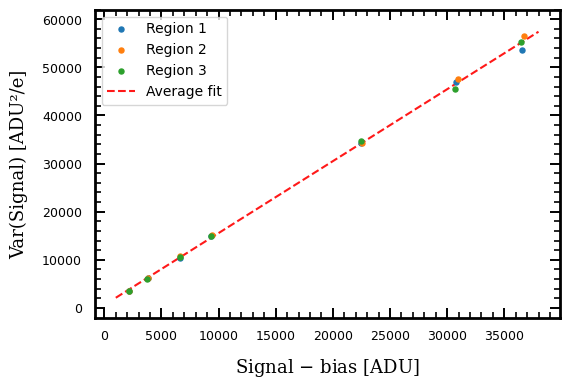

In [14]:
# Creamos la figura

fig, ax = plt.subplots(figsize=(6,4))

# Parámetros del gráfico
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())

ax.tick_params(bottom=True,top=True,left=True,right=True)
ax.tick_params(which='minor',bottom=True,top=True,left=True,right=True)

ax.spines[['bottom','left','top','right']].set_linewidth(2.0)

ax.tick_params(axis='both',which='both',direction='in')
ax.tick_params(axis='both',which='major',labelsize=9,length=7,pad=9,width=1.4)
ax.tick_params(axis='both',which='minor',length=4,width=1.2)

#ax.set_xlim([-30,530])
ax.set_ylim([-2000,62000])

#titulos
ax.set_xlabel('Signal $-$ bias [ADU]',fontname='Serif',fontsize=13,labelpad=10)
ax.set_ylabel('Var(Signal) [ADU²/e]',fontname='Serif',fontsize=13,labelpad=10)

#datos
for i in range(3):
    lableg = 'Region '+str(i+1)
    graf2 = ax.scatter(signal[:,i], varianza[:,i], s=13, label=lableg)
    
(Gan_inv, N_gan), Err_Matrix2 = np.polyfit(np.mean(signal, axis=1), np.mean(varianza, axis=1), deg=1, cov=True)
ax.plot([1000,38000], Gan_inv*np.array([1000,38000])+N_gan, color='r', alpha=0.9,
        linestyle='dashed', linewidth=1.5, zorder=-1, label='Average fit')
    
ax.legend()

Err_R = np.sqrt(N_gan)/Gan_inv*np.sqrt((0.5*Err_Matrix2[1,1]/N_gan)**2 - (Err_Matrix2[0,0]/Gan_inv)**2)

print(' Ganancia: ', np.round(1/Gan_inv,4),'[e/ADU]','\n',
     'Ruido de lectura: ', np.round(np.sqrt(N_gan)/Gan_inv,2), '[e^{1/2}]', '\n', 
     f'Errores:   Ganancia={np.sqrt(Err_Matrix2[0,0]/Gan_inv**2):.4f}   R={np.sqrt(Err_R):.2f}')

plt.show()

In [15]:
print('m=',Gan_inv, '   n=', N_gan)
print('ERRORES\n', 'Pendiente:', np.sqrt(Err_Matrix2[0,0]), '\n Ordenada:', np.sqrt(Err_Matrix2[1,1]))

m= 1.4941463802047221    n= 628.3364067817606
ERRORES
 Pendiente: 0.00703403583275218 
 Ordenada: 144.20900843684092
